# Wrangle and Analyze Data

This project is for practicing wrangling and analyzing dataset using WeRateDogs Twitter data.

### 0.0 Import packages

In [1164]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Gathering

### 1.1 WeRateDogs Twitter archive (File on hand)

In [1042]:
# Import Twitter archive csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2 Tweet image predictions on Udacity's servers

In [1043]:
# Check current directory
os.getcwd()

'C:\\Program Files\\Git\\data-analyst\\20180617_Wrangle and Analyze Data'

In [1044]:
# Get response by sending GET requerst to the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [1045]:
# Write the response to a file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [1046]:
# Import the tsv file to the memory
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 Twitter API Query

In [1047]:
# API key and token information
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [1048]:
# Create tweet_json.txt file by dumping query results
with open('tweet_json.txt', 'a') as file:
    for tweet_id in twitter_archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError:
            continue

Rate limit reached. Sleeping for: 471
Rate limit reached. Sleeping for: 490


In [1049]:
# Create new DataFrame for Twitter API Query
queried_df = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

# Populate the DataFrame with the query results
with open('tweet_json.txt', 'r') as file:
    i = 0
    for line in file:
        element = json.loads(line)
        queried_df.loc[i] = [element['id'], element['retweet_count'], element['favorite_count']]
        i = i+1

In [1050]:
queried_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8558,38674
1,892177421306343426,6291,33154
2,891815181378084864,4173,24959
3,891689557279858688,8689,42061
4,891327558926688256,9449,40214


## 2. Assessing and Cleaning

I will assess and clean it together.

## 2.1 Tidiness

### 2.1.1 Three Different DataFrames for Tweet Data
All DataFrames describes the observations of each tweet. There is no need for the data to be splited into different DataFrames. I will merge 3 DataFrames to make analysis easier. Since the twitter_archive has the largest observations (2,536), I will use left join to keep the observations in twitter_archive.

In [1265]:
# Join left twitter_archive and queried_df
df_merged = twitter_archive.merge(queried_df, on='tweet_id', how='left')
df = df_merged.merge(image_predictions, on='tweet_id', how='left')

In [1266]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## 2.2 Quality
Since 'tweet_id' column will be placed in other new tables, I found it is better to deal with this data type quality issue first and then deal with the further tidiness issues. Also, we will take a look at the tweets that are not retweets and have images. I will exclude other data, which are retweets or do not have images.

### 2.2.1 Float Data Types for Tweet ID
Tweet ID makes sense when its data type is string. Some ID columns' data type is float64, which makes the value in exponential expressions. In order to deal with this problem, I will first convert it to int64 data type and convert it to string again.

In [1267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 2

In [1268]:
df[df.in_reply_to_status_id.notnull() & df.in_reply_to_user_id.notnull()].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1269]:
# Change the data types of tweet IDs to int64 and to string
df.in_reply_to_status_id = df.in_reply_to_status_id[df.in_reply_to_status_id.notnull()].astype('int64').astype(str)
df.in_reply_to_user_id = df.in_reply_to_user_id[df.in_reply_to_user_id.notnull()].astype('int64').astype(str)
df.retweeted_status_id = df.retweeted_status_id[df.retweeted_status_id.notnull()].astype('int64').astype(str)
df.retweeted_status_user_id = df.retweeted_status_user_id[df.retweeted_status_user_id.notnull()].astype('int64').astype(str)

In [1270]:
df[df.in_reply_to_status_id.notnull() & df.in_reply_to_user_id.notnull()].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
184,856526610513747968,855818117272018944,4196983835,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,...,1.0,Old_English_sheepdog,0.798481,True,Tibetan_terrier,0.060602,True,standard_poodle,0.040722,True


### 2.2.2 Duplicate Tweets

There are duplicate observations in the dataset. I will remove one of each duplicate values in order to have only unique tweet IDs in the dataset.

In [1271]:
# Duplicate observations
duplicate_id = df[df.tweet_id.duplicated()].tweet_id

df[df.tweet_id.isin(duplicate_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [1272]:
# Drop the duplicate observations
df = df[~df.tweet_id.duplicated()]

In [1273]:
# Check the duplicate IDs
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### 2.2.3 Unnecessary Retweet Observations

We will analyze only the tweet observations, not retweet observations. Let's drop retweet observations.
Retweet text starts with 'RT ...'.

In [1274]:
# Retweet texts
df.text[df.text.str.startswith('RT', na=False)].head()

19    RT @dog_rates: This is Canela. She attempted s...
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36    RT @dog_rates: This is Lilly. She just paralle...
68    RT @dog_rates: This is Emmy. She was adopted t...
73    RT @dog_rates: Meet Shadow. In an attempt to r...
Name: text, dtype: object

In [1275]:
# Drop retweets
df = df.drop(index=df.text[df.text.str.startswith('RT', na=False)].index)

In [1276]:
# No more retweet texts
df.text[df.text.str.startswith('RT', na=False)].head()

Series([], Name: text, dtype: object)

### 2.2.4 Empty images

There are observations without images. The number of total observations is 2,173, but the number of the observation with image is 1,993. Let's drop the observations without images.

In [1277]:
# Null values in jpg_url
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2173 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2173 non-null object
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
name                          2173 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
retweet_count                 2172 non-nu

In [1278]:
# Drop the observations without images
df = df[df.jpg_url.notnull()]

In [1279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      1993 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     1993 non-null object
source                        1993 non-null object
text                          1993 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1993 non-null object
rating_numerator              1993 non-null int64
rating_denominator            1993 non-null int64
name                          1993 non-null object
doggo                         1993 non-null object
floofer                       1993 non-null object
pupper                        1993 non-null object
puppo                         1993 non-null object
retweet_count                 1992 non-nu

### 2.2.5 Unnecessary Retweet Columns

Columns 'retweeted_status_id', 'retweeted_status_user_id ', and 'retweeted_status_timestamp' don't have any values, since I deleted all the retweet observations. We can drop these unnecessary columns.

In [1280]:
# drop unnecessary retweet columns
df = df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [1281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1993 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
doggo                    1993 non-null object
floofer                  1993 non-null object
pupper                   1993 non-null object
puppo                    1993 non-null object
retweet_count            1992 non-null object
favorite_count           1992 non-null object
jpg_url                  1993 non-null object
img_num                  1993 non-null float64
p1                       1993 non-null object
p1_conf                 

## 2.1 Tidiness

### 2.1.2 Four Different Columns for Picture Type

Doggo, Floofer, Pupper, Puppo columns are picture types and no tweet has two different picture types. 4 columns should be melted and be a value of the new column 'picture_type'.

In [1282]:
# No tweet has two different picture types
df[['doggo', 'floofer', 'pupper', 'puppo']][((df['doggo'] == 'doggo') + (df['floofer'] == 'floofer') + (df['pupper'] == 'pupper') + (df['puppo'] == 'puppo')) > 1]

C:\Users\scian\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,doggo,floofer,pupper,puppo


In [1283]:
# Melt 4 different picture types and make a new column for them
melted = pd.melt(df[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']], id_vars='tweet_id', var_name = 'picture_type')
melted_type = melted[melted['picture_type'] == melted['value']][['tweet_id', 'picture_type']]

melted_type.sample(5)

,tweet_id,picture_type
5537,674638615994089473,pupper
5430,677557565589463040,pupper
4857,727314416056803329,pupper
137,858843525470990336,doggo
5346,681231109724700672,pupper


In [1284]:
# Join original DataFrame and the new melted DataFrame and then drop the unnecessray columns
df = df.merge(melted_type, on='tweet_id', how='left')
df = df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

df.picture_type.value_counts()

pupper     212
doggo       74
puppo       23
floofer      8
Name: picture_type, dtype: int64

### 2.1.3 Three Different Information in Text Column
- Sample: "Meet Nugget and Hank. Nugget took Hank's bone. Hank is wondering if you would please return it to him. Both 13/10 would not intervene https://t.co/ogith9ejNj"

Text column includes Text, Rating, Tweet Link Information. Different information in a same column is not tidy. Furthermore, Rating information is specified in other columns. I would like to  delete the Rating information , however, deleting only the Rating part could harm the general meaning of the text. For example, in case of the sample above, sentence "Both .. would not intervene" without rating would make the meaning of the text ambiguous. So I will split the text to only two parts: text and link.

In [1285]:
# Split the text column using regex
extracted = df.text.str.extract('([\s\S]*)(http.+)', expand=True)
df[['text', 'link']] = extracted

# Strip each column to delete the unnecessary space
df.text = df.text.str.strip()

In [1286]:
# Create a new dataframe for tweet links
tweet_links = df[['tweet_id', 'link']]

# Delete link column in original DataFrame
df.link = np.nan

There are tweet links still in the text column. I will split it again and add those links in tweet_links dataframe.

In [1287]:
# Extract tweets link from the text again
extracted2 = df.text.str.extract('([\s\S]*)(http.+)', expand=True)
additional_links = extracted2[extracted2[1].notnull()]
additional_links = additional_links.rename(columns={0:"text", 1:"link"})
df.loc[additional_links.index, ['text', 'link']] = additional_links

# Strip each column to delete the unnecessary space
df.text = df.text.str.strip()

In [1288]:
# Append extracted tweet links to the tweet_links dataframe
tweet_links = pd.concat([tweet_links, df[['tweet_id', 'link']][df.link.notnull()]])

# Delete link column in original DataFrame
df = df.drop('link', axis=1)

Let's check if there are more tweet links in the text.

In [1289]:
# No more tweet links in text column
df.text.str.extract('([\s\S]*)(http.+)', expand=True)[0].value_counts()

Series([], Name: 0, dtype: int64)

### 2.1.4 Duplicate and Multiple URLs in Expanded URLs Column
Some of the urls in the column 'expanded_urls' somehow have duplicate URLs with comma. Duplicate URLs should be deleted and each tweet should have different expanded URLs if there are multiple URLs. Since a tweet can have multiple URLs, I will create another DataFrame which has the multiple URL information for each tweet.

In [1290]:
# Expanded URLs values
df.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/751583847268179968/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/741067306818797568/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/808106460588765185/photo/1                                                                                                                                                          

In [1291]:
# Create a DataFrame for Multiple URLs
tweet_urls = df[['tweet_id', 'expanded_urls']]

# Split expanded URLs and append each single URL to the new DataFrame
tweet_urls = tweet_urls.join(df.expanded_urls.str.split(pat=',', expand=True))

# Drop the column 'expended_urls'
tweet_urls = tweet_urls.drop(['expanded_urls'], axis=1)

tweet_urls.head()

,tweet_id,0,1,2,3,4
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...,None,None,None,None
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,None,None,None,None
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,None,None,None,None
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,None,None,None,None
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None


In [1292]:
# Reshape the tweet_urls table so that one url column can have multiple URLs of each tweet
tweet_urls = pd.melt(tweet_urls, id_vars='tweet_id', var_name='url')
tweet_urls['url'] = tweet_urls['value']
tweet_urls = tweet_urls.drop(['value'], axis=1)

# Delete rows where link is null
tweet_urls = tweet_urls[tweet_urls.url.notnull()]

tweet_urls.head()

,tweet_id,url
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...


In [1293]:
# Drop expanded_url in original dataset
df = df.drop('expanded_urls', axis=1)

## 2.2 Quality

### 2.2.6 String Data Type for Timestamp columns
'timestamp' columns' data type is string. Changing the data type to datetime makes the further analysis easier. Since all the timestamp ends with +0000, we can assume that all the timestamp of dataset follows same timezone.

In [1294]:
# All timestamp ends with +0000
df.timestamp.str[-5:][df.timestamp.str[-5:] != '+0000']

Series([], Name: timestamp, dtype: object)

In [1295]:
# Change the data types of timestamps to datetime
df.timestamp = pd.to_datetime(df.timestamp)

In [1296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 2003
Data columns (total 23 columns):
tweet_id                 2004 non-null object
in_reply_to_status_id    24 non-null object
in_reply_to_user_id      24 non-null object
timestamp                2004 non-null datetime64[ns]
source                   2004 non-null object
text                     2004 non-null object
rating_numerator         2004 non-null int64
rating_denominator       2004 non-null int64
name                     2004 non-null object
retweet_count            2003 non-null object
favorite_count           2003 non-null object
jpg_url                  2004 non-null object
img_num                  2004 non-null float64
p1                       2004 non-null object
p1_conf                  2004 non-null float64
p1_dog                   2004 non-null object
p2                       2004 non-null object
p2_conf                  2004 non-null float64
p2_dog                   2004 non-null object
p3            

### 2.2.7 Source Column with Entire HTML Link Code
The column 'source' contains entire HTML link code. Wrangling it to show just the source makes the dataset simple and helps further analysis. Since there are only 4 sources in our dataset, I will change the data type to category as well.

In [1297]:
# Source column values
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1965
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1298]:
# Source column shows only the source
df.source = df.source.str.extract('.+>(.+)<.+').astype('category')

C:\Users\scian\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [1299]:
# Source column values
df.source.value_counts()

Twitter for iPhone    1965
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### 2.2.8 Wrong Rating Indicators
It seems that rating numerator and denominator is from just the first strings that mathces the pattern (digits)/(digits) in the text. However, sometimes it could mean the date or 50/50, as in half and half. Let's find some wrong rating indicators and fix it.

In [1300]:
# The text of tweets that do not have denominator of 10 
df[df.rating_denominator != 10].text.values

array(['The floofs have been released I repeat the floofs have been released. 84/70',
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:',
       'Why does this never happen at my front door... 165/150',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once',
       'Happy 4/20 from the squad! 13/10 for all',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody",
       "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80",
       'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once',
       "Here is a wh

Among those texts, the rating of the text that has two (digits)/(digits) pattern should be changed to the second one.

In [1301]:
# Find the second occurence of (digits)/(digits) pattern
rating_fix = df[df.rating_denominator != 10].text.str.extract('\d+/\d+.*?(\d+)/(\d+)', expand=True)
rating_fix = rating_fix[rating_fix[0].notnull()]
rating_fix = rating_fix.rename(columns={0: "rating_numerator", 1: "rating_denominator"})

rating_fix

,rating_numerator,rating_denominator
810,14,10
902,13,10
936,11,10
1339,10,10
1983,9,10


In [1302]:
# Insert the correct value to original dataframe
df.loc[rating_fix.index, ['rating_numerator', 'rating_denominator']] = rating_fix

# Check if the value is well inserted
df.loc[rating_fix.index, ['rating_numerator', 'rating_denominator']]

# Change the data type of columns to integer
df.rating_numerator = df.rating_numerator.astype(int)
df.rating_denominator = df.rating_denominator.astype(int)

### 2.2.9 String DataType for Retweet and Favorite Count
Retweet counts and favorite count should be integer data type for further analysis. Let's fix it.

In [1303]:
# Drop 1 observation which doesn't have retweet count and favorite count
df = df[~df.retweet_count.isnull()]

# Change the data type for retweet count and favorit count to integer
df.retweet_count = df.retweet_count.astype(int)
df.favorite_count = df.favorite_count.astype(int)

In [1304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2003
Data columns (total 23 columns):
tweet_id                 2003 non-null object
in_reply_to_status_id    24 non-null object
in_reply_to_user_id      24 non-null object
timestamp                2003 non-null datetime64[ns]
source                   2003 non-null category
text                     2003 non-null object
rating_numerator         2003 non-null int32
rating_denominator       2003 non-null int32
name                     2003 non-null object
retweet_count            2003 non-null int32
favorite_count           2003 non-null int32
jpg_url                  2003 non-null object
img_num                  2003 non-null float64
p1                       2003 non-null object
p1_conf                  2003 non-null float64
p1_dog                   2003 non-null object
p2                       2003 non-null object
p2_conf                  2003 non-null float64
p2_dog                   2003 non-null object
p3            

## 3. Storing

Let's store the clean DataFrames in CSV files.
There are total 3 DataFrames to store.
- df (General tweet information)
- tweet_links (Tweet links URL)
- tweet_urls (Expanded URL)

In [1305]:
# Store DataFrames
df.to_csv('cleaned/twitter_archive_master.csv')
tweet_links.to_csv('cleaned/twitter_links_master.csv')
tweet_urls.to_csv('cleaned/twitter_urls_master.csv')

## 4. Analyzing and Visualizing

### 4.1 Does the tweet with high rating get more retweets or favorites?

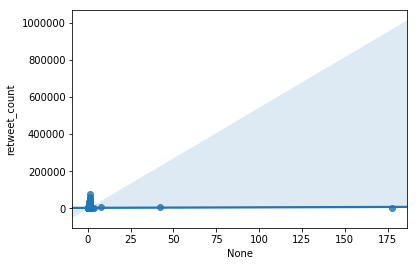

In [1306]:
sns.regplot(x=(df.rating_numerator / df.rating_denominator), y=df.retweet_count);

The graph is not intuitive because of outliers. Let's remove outliers in rating proportion.

In [1307]:
# Get the 99% quantile of rating proportion and filter the outliers
rating_outlier_limit = (df.rating_numerator / df.rating_denominator).quantile(0.99)
retweet_outlier_limit = df.retweet_count.quantile(0.99)

df_filter1 = df[((df.rating_numerator / df.rating_denominator) < rating_outlier_limit) & (df.retweet_count < retweet_outlier_limit)]

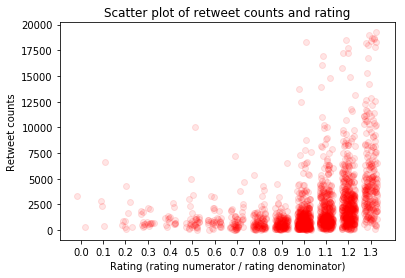

In [1308]:
# Scatter plot
sns.regplot(x=(df_filter1.rating_numerator / df_filter1.rating_denominator), y=df_filter1.retweet_count, x_jitter=0.03, 
            scatter_kws={'alpha': 0.1}, fit_reg=False, color='red');
plt.xticks(np.arange(0, 1.4, 0.1));
plt.xlabel('Rating (rating numerator / rating denominator)');
plt.ylabel('Retweet counts');
plt.title('Scatter plot of retweet counts and rating');

What about with favorite counts?

In [1309]:
# Get the 99% quantile of rating proportion and filter the outliers
favorite_outlier_limit = df.favorite_count.quantile(0.99)

df_filter2 = df[((df.rating_numerator / df.rating_denominator) < rating_outlier_limit) & (df.favorite_count < favorite_outlier_limit)]

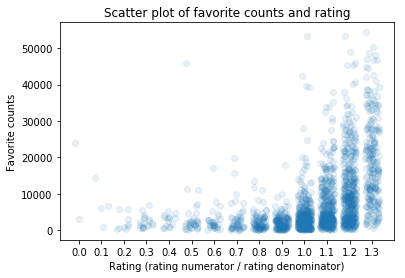

In [1310]:
# Scatter plot
a = sns.regplot(x=(df_filter2.rating_numerator / df_filter2.rating_denominator), y=df_filter2.favorite_count, x_jitter=0.03, 
            scatter_kws={'alpha': 0.1}, fit_reg=False)
plt.xticks(np.arange(0, 1.4, 0.1))
plt.xlabel('Rating (rating numerator / rating denominator)')
plt.ylabel('Favorite counts');
plt.title('Scatter plot of favorite counts and rating');

> Rating and social popularity (retweet counts and favorite counts) show a positive relationship. It means that when a user tweeted a picture of a dog with a higher rating, he is likely to get more retweets and favorites!

### 4.2 What time do the people upload WeRateDogs tweets ?

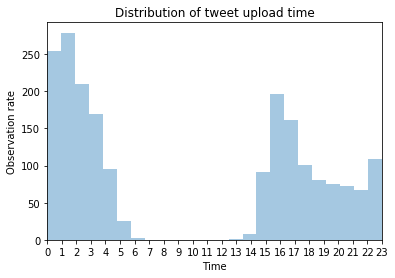

In [1311]:
# Histogram of tweet upload time
sns.distplot(df.timestamp.dt.hour, bins=24, kde=False);
plt.xlim(0,23);
plt.xticks(range(0, 24, 1));
plt.xlabel('Time')
plt.ylabel('Observation rate');
plt.title('Distribution of tweet upload time');

> The histogram of time shows a bimodal distribution. Users upload the WeRateDogs tweet between midnight to 2AM the most and quite a lot between 3PM and 4PM. The tweets are rarely observed in the morning and early afternoon.

### 4.3 Does the tweet with a picture type get higher rating?

In [1312]:
# Change the missing values in picture type column to analaysis
df_for_figtype_analysis = df
df_for_figtype_analysis.picture_type = df_for_figtype_analysis.picture_type.fillna('notype')

# Average rating by type
avg_rating_by_type = df_for_figtype_analysis.groupby(df_for_figtype_analysis.picture_type).mean()[['rating_numerator', 'rating_denominator']]
avg_rating_by_type = avg_rating_by_type.rating_numerator / avg_rating_by_type.rating_denominator
avg_rating_by_type

picture_type
doggo      1.178378
floofer    1.187500
notype     1.177994
pupper     1.072642
puppo      1.204348
dtype: float64

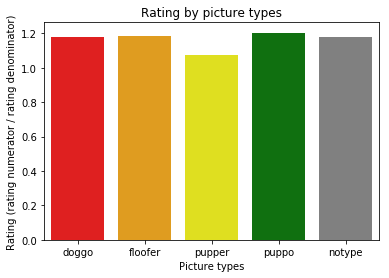

In [1313]:
# Bar graph of averge rating by picture type
sns.barplot(x=avg_rating_by_type.index, y=avg_rating_by_type, order=['doggo', 'floofer', 'pupper', 'puppo', 'notype'],
           palette=['red', 'orange', 'yellow', 'green', 'gray']);
plt.xlabel('Picture types')
plt.ylabel('Rating (rating numerator / rating denominator)');
plt.title('Rating by picture types');

> The tweets without picture type and with picture type do not show a significant difference in rating.